# Azure OpenAI Embeddings

## Set up environment

In [5]:
import os
from dotenv import load_dotenv # pip install python-dotenv
from openai import AzureOpenAI # pip install openai

load_dotenv("./../credentials_my.env")
os.environ["AZURE_OPENAI_ENDPOINT"] ="https://mmapim02.azure-api.net/aoai" #  os.environ["AZURE_OPENAI_ENDPOINT_04"]
os.environ["AZURE_OPENAI_API_KEY"] = "dc89792b64404b98b1059b307a62d932" # os.environ["AZURE_OPENAI_API_KEY_04"]

chat_model                     = "gpt-4o-2024-05-13" # os.environ["GPT-4-32-0613-32k"]
embeddings_model_2_model       = "embedding_with_apim" # os.environ["TEXT-EMBEDDING-ADA-002"]
embeddings_model_3_small_model = os.environ["TEXT-EMBEDDING-3-SMALL"]
embeddings_model_3_large_model = os.environ["TEXT-EMBEDDING-3-LARGE"]

client = AzureOpenAI(
  api_version = os.getenv("AZURE_OPENAI_API_VERSION")
  # api_key = os.getenv("AZURE_OPENAI_API_KEY"),
  # azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
)

In [15]:
messages=[
    {
        "role": "system",
        "content": "You are an AI assistant that helps people find information."
    },
    {
        "role": "user",
        "content": "tell me five good names for my new pizzeria"
    }
]

for i in range(200):
    print(i)
    response = client.chat.completions.create(
        model    = os.environ['GPT-4O-20240513-128K'],
        messages = messages)

    response

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [13]:
response.

ChatCompletion(id='chatcmpl-9caKHhfWhXM9d7Xh7z2teTq42xrQA', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Sure, here are five creative and catchy names for your new pizzeria:\n\n1. **Bella Vita Pizzeria**\n2. **Fired Up Pizza Co.**\n3. **Twist & Crust Pizzeria**\n4. **Urban Slice Pizzeria**\n5. **Molto Bene Pizza House**\n\nI hope one of these names resonates with the vibe you want for your pizzeria!', role='assistant', function_call=None, tool_calls=None), content_filter_results={'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}})], created=1718983129, model='gpt-4o-2024-05-13', object='chat.completion', system_fingerprint='fp_abc28019ad', usage=CompletionUsage(completion_tokens=78, prompt_tokens=32, total_tokens=110), prompt_filter_results=[{'prompt_index': 0, 'content_filter_

## Test embeddings generation

In [4]:
client.embeddings.create(input = ["Rabbit"], model=embeddings_model_2_model).data[0].embedding[:5]

NotFoundError: Error code: 404 - {'statusCode': 404, 'message': 'Resource not found'}

## Create a helper function

In [ ]:
def generate_embeddings(text, model="text-embedding-ada-002"): # model = "deployment_name"
    return client.embeddings.create(input = [text], model=model).data[0].embedding

generate_embeddings("Rabbit")[:5]

# Test different embeddings models

In [ ]:
for m in (embeddings_model_2_model, embeddings_model_3_small_model, embeddings_model_3_large_model):
    embeddings = generate_embeddings(text="anatine amigos", model=m)
    print(f"Embeddings in ({m}): {len(embeddings)}. First elements: {[round(embeddings[i],3) for i in [0,1,2,-1]]}")    

# Choose our model

In [ ]:
model = embeddings_model_3_small_model

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Learn how to generate embeddings with Azure OpenAI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

In [ ]:
import numpy as np
embeddings = generate_embeddings("rabbit")
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
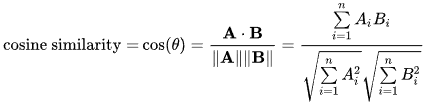

In [ ]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
print(numerator)

In [ ]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
print(denominator)

In [ ]:
print(numerator / denominator)

In [ ]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cs = cosine_similarity(np.array([1,2,3]),np.array([-4,5,6]))
print(cs)

In [ ]:
cs = cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))
print(cs)

## Create an embedding for a single word

In [ ]:
#openai.Embedding.create(input="rabbit", engine=azure_openai_deployment_emb)['data'][0]['embedding']
generate_embeddings("rabbit")

## Check distance between two words

In [ ]:
v1 = generate_embeddings("rabbit")
v2 = generate_embeddings("space shuttle") # dog, elephant, car, space shuttle

cs = cosine_similarity(v1,v2)
print(cs)

# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [ ]:
import pandas as pd
file_name = 'words'
df = pd.read_csv(f'{file_name}.csv')
print(df)

In [ ]:
try:    
    #df["text_embeddings"] = df["text"].apply(lambda x: openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
    df["text_embeddings"] = df["text"].apply(lambda x: generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    #print('switching to pickle file...')
    df = pd.read_pickle(f"{file_name}_enriched.pkl")

df

In [ ]:
search_term = input ('Insert a search term:\n') # "hot dog", "torta"...

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)
df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df

In [ ]:
df.sort_values("similarity", ascending=False)

In [ ]:
search_term = "gateau"
#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = generate_embeddings(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

# Campaign Speeches

In [ ]:
file_name = 'discorso_presidente_del_consiglio'

df = pd.read_csv(f'{file_name}.csv')

df

In [ ]:
try:
    df["text_embeddings"] = df["text"].apply(lambda x: 
       # openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
       generate_embeddings(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    df.to_csv(f"{file_name}_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    df = pd.read_pickle(f"{file_name}_enriched.pkl")
    
df

In [ ]:
# accoglienza profughi extracomunitari --> flussi migratori, traffico di essere umani, immigrazione
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n')

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df.sort_values("similarity", ascending=False).head(5)

## Generalize top paragraphs identification

In [ ]:
def top_paragraphs_identification (search_term, top_terms=5):
    # search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
    search_term_vector = model.embed_query(search_term)
    df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return df.sort_values("similarity", ascending=False).head(top_terms)


# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"
# "Quale strada vuole perseguire il governo?"

question = "Quali sono le donne italiane che hanno dimostrato valore?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")